In [10]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
all_data = pd.read_csv("SBIBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13
1,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14
2,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13
3,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14
4,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14


In [12]:
Close_list = all_data['Close'].tolist()
total=len(Close_list);


In [13]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
for i in range(0,total):
  D1.append(Close_list[j])
  D2.append(Close_list[j+1])
  D3.append(Close_list[j+2])
  D4.append(Close_list[j+3])
  D5.append(Close_list[j+4])
  D6.append(Close_list[j+5])
  D7.append(Close_list[j+6])
  D8.append(Close_list[j+7])
  diff=Close_list[j+7]-Close_list[j+6]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+7]
  PERCDIFF.append(percdiff)
  if(percdiff>0.7):
    TARGET.append('pos')
  elif(percdiff<-0.7):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-7):
    break

In [14]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(DIFF)
df10=pd.DataFrame(PERCDIFF)
df11=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['DIFF']=df9
df['PERCDIFF']=df10
df['TARGET']=df11
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,DIFF,PERCDIFF,TARGET
0,243.65,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,-3.20,-1.307457,neg
1,259.10,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,-0.25,-0.102249,neu
2,248.45,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,-5.30,-2.215719,neg
3,261.00,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,-3.30,-1.398898,neg
4,273.30,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,0.55,0.232607,neu
5,269.50,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,7.50,3.074400,pos
6,247.95,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,-6.25,-2.629365,neg
7,244.75,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,-0.25,-0.105285,neu
8,244.50,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,-9.15,-4.007884,neg
9,239.20,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,-3.45,-1.534356,neg


In [15]:
features = ['D1','D2','D3','D4','D5','D6']
df1=df[features]
df1['TARGET']=df['TARGET']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,D1,D2,D3,D4,D5,D6,TARGET
0,243.65,259.10,248.45,261.00,273.30,269.50,neg
1,259.10,248.45,261.00,273.30,269.50,247.95,neu
2,248.45,261.00,273.30,269.50,247.95,244.75,neg
3,261.00,273.30,269.50,247.95,244.75,244.50,neg
4,273.30,269.50,247.95,244.75,244.50,239.20,neu


In [16]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df1['TARGET']=='pos','1',(np.where(df['TARGET']=='neg','-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,-1
1,0
2,-1
3,-1
4,0


TARGET
-1    1887
0     1703
1     1980
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

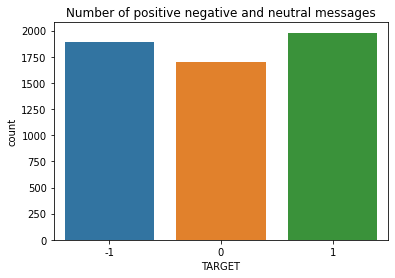

In [17]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [18]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df1.columns:
  if df1[col].dtype=='object':
    df1[col]=pd.Categorical(df1[col]).codes
df1.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,D1,D2,D3,D4,D5,D6,TARGET
0,243.65,259.10,248.45,261.00,273.30,269.50,0
1,259.10,248.45,261.00,273.30,269.50,247.95,1
2,248.45,261.00,273.30,269.50,247.95,244.75,0
3,261.00,273.30,269.50,247.95,244.75,244.50,0
4,273.30,269.50,247.95,244.75,244.50,239.20,1
...,...,...,...,...,...,...,...
95,180.40,180.60,184.30,187.80,192.50,198.60,0
96,180.60,184.30,187.80,192.50,198.60,203.80,2
97,184.30,187.80,192.50,198.60,203.80,199.30,2
98,187.80,192.50,198.60,203.80,199.30,202.05,2


In [19]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6
0,0.030521,0.035135,0.031955,0.035703,0.039376,0.038241
1,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805
2,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850
3,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775
4,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192


In [20]:
x=feature_transform
x.head()
y=df1['TARGET']
y.head()

,D1,D2,D3,D4,D5,D6
0,0.030521,0.035135,0.031955,0.035703,0.039376,0.038241
1,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805
2,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850
3,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775
4,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192


0    0
1    1
2    0
3    0
4    1
Name: TARGET, dtype: int8

In [21]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(3899, 6)

(1671, 6)

(3899, 6)

(3899,)

In [22]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight = 'balanced')

In [23]:
log.fit(train_x,train_y)

LogisticRegression(class_weight='balanced', max_iter=500, multi_class='ovr',
                   tol=1e-05)

In [24]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

1671


In [25]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 506
Negative cases in Test Data: 558


# **ACCURACY SCORE-LOGISTIC REGRESSION class_weight = 'balanced'**

In [26]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.32974266906044286


In [27]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.35      0.25      0.29       558
           1       0.30      0.61      0.41       506
           2       0.39      0.17      0.24       607

    accuracy                           0.33      1671
   macro avg       0.35      0.34      0.31      1671
weighted avg       0.35      0.33      0.31      1671



CONFUSION MATRIX


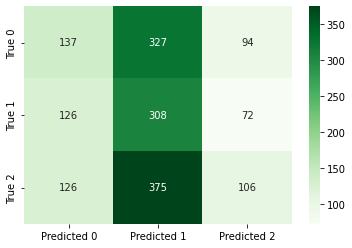

In [28]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [29]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight=None)

In [30]:
log.fit(train_x,train_y)

LogisticRegression(max_iter=500, multi_class='ovr', tol=1e-05)

In [31]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

1671


In [32]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 506
Negative cases in Test Data: 558


# **ACCURACY SCORE-LOGISTIC REGRESSION class_weight=None**

In [33]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.3632555356074207


In [34]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.50      0.00      0.00       558
           1       0.00      0.00      0.00       506
           2       0.36      1.00      0.53       607

    accuracy                           0.36      1671
   macro avg       0.29      0.33      0.18      1671
weighted avg       0.30      0.36      0.19      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


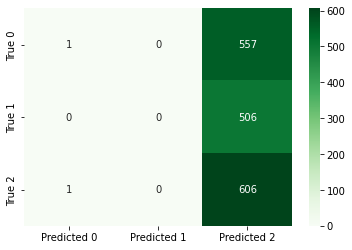

In [35]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [36]:
#FIND OUT PROBABLITY PF THE CLASSES AND PREDICTED CLASSES
predicted_prob=log.predict_proba(test_x)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(classes)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df],axis=1)
predicted_df.columns=['prob_0','prob_1','prob_2','class']
predicted_df.sample(10)

,prob_0,prob_1,prob_2,class
40,0.348231,0.295887,0.355882,2
1231,0.338936,0.309786,0.351278,2
1470,0.334085,0.320134,0.345781,2
1241,0.334836,0.318500,0.346664,2
1621,0.334395,0.319012,0.346594,2
1234,0.351155,0.287289,0.361556,2
1614,0.350806,0.284692,0.364502,2
666,0.334809,0.318439,0.346752,2
655,0.335071,0.318685,0.346244,2
1014,0.334421,0.319231,0.346349,2


In [37]:
predicted_df.groupby('class').size()

class
0       2
2    1669
dtype: int64

In [38]:
#APPLY NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL
new_y_test=predicted_prob[:,1]>=0.35
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       558
           1       0.00      0.00      0.00       506
           2       0.00      0.00      0.00       607

    accuracy                           0.33      1671
   macro avg       0.11      0.33      0.17      1671
weighted avg       0.11      0.33      0.17      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**ACCURACY SCORE-LOGISTIC REGRESSION APPLYING NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL**

In [39]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,new_y_test))

ACCUIRACY SCORE
0.3339317773788151


In [40]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,new_y_test))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       558
           1       0.00      0.00      0.00       506
           2       0.00      0.00      0.00       607

    accuracy                           0.33      1671
   macro avg       0.11      0.33      0.17      1671
weighted avg       0.11      0.33      0.17      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


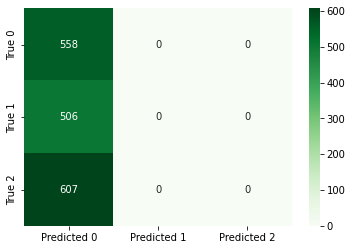

In [41]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,new_y_test)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [43]:
!jupyter nbconvert SBIpercdiff_0_7_SMP_LR.ipynb

[NbConvertApp] Converting notebook SBIpercdiff_0_7_SMP_LR.ipynb to html
[NbConvertApp] Writing 418598 bytes to SBIpercdiff_0_7_SMP_LR.html
